# Tarea 5: Optimización

## Para entregarse el jueves 16 marzo 2017, antes de las 15:00

In [4]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

Una tarea importante en la ciencia computacional es la **optimización**, es decir, encontrar máximos y mínimos de funciones. Representa una aplicación de suma importancia de derivadas, como aprendimos en Cálculo 1 y 3 y en el notebook 7.

[1] Escribe una función que toma una función $f:\mathbb{R} \to \mathbb{R}$ lisa (es decir, suficientemente diferenciable), y utiliza el método de Newton para encontrar:
(i) los valores de $x$ en los cuales la función toma su valor máximo y mínimo;
(ii) el valor ahí;
(iii) si es un máximo o un mínimo.

[Pista: ¿Cuáles son las condiciones matemáticas que se deben cumplir para (i) y (iii)?]

In [1]:
function cociente_difer(f::Function, a::Number, h)

        dif = (f(a + h) - f(a)) / h
    
    return dif
end

cociente_difer (generic function with 1 method)

In [21]:
""" La función Newton(f::Function, fp, x0::Number, n) calcula, a partir de una condición inicial x0,
la aproximación a una raíz de la función f con derivada fp, al iterar n veces."""

function Newton(f::Function, fp, x0::Number, n::Int64)
    xx = Number[x0]
    yy = Number[]
    for i in 1:n
        y = f(xx[i])
        dy = fp(xx[i])
        xn = xx[i] - y/dy
        push!(yy, xn)
        push!(xx, xn)
        #@show i, y, dy, v
    end
    pop!(xx)
    return xx, yy
end

Newton

In [ ]:
function Newtd(f::Function, fp, x0::Number, n::Int64)
    xx = Number[x0]
    yy = Number[]
    for i in 1:n
        y = f(xx[i])
        dy = fp(xx[i])
        xn = xx[i] - y/dy
        push!(yy, xn)
        push!(xx, xn)
        #@show i, y, dy, v
    end
    pop!(xx)
    return xx, yy
end

In [22]:
f(x) = x^2
fp(x) = 2x;

In [29]:
a, b = Newton(f, fp, 10, 50)

(Number[10,5.0,2.5,1.25,0.625,0.3125,0.15625,0.078125,0.0390625,0.0195313  …  9.09495e-12,4.54747e-12,2.27374e-12,1.13687e-12,5.68434e-13,2.84217e-13,1.42109e-13,7.10543e-14,3.55271e-14,1.77636e-14],Number[5.0,2.5,1.25,0.625,0.3125,0.15625,0.078125,0.0390625,0.0195313,0.00976563  …  4.54747e-12,2.27374e-12,1.13687e-12,5.68434e-13,2.84217e-13,1.42109e-13,7.10543e-14,3.55271e-14,1.77636e-14,8.88178e-15])

In [32]:
a[end], b[end]

(1.7763568394002505e-14,8.881784197001252e-15)


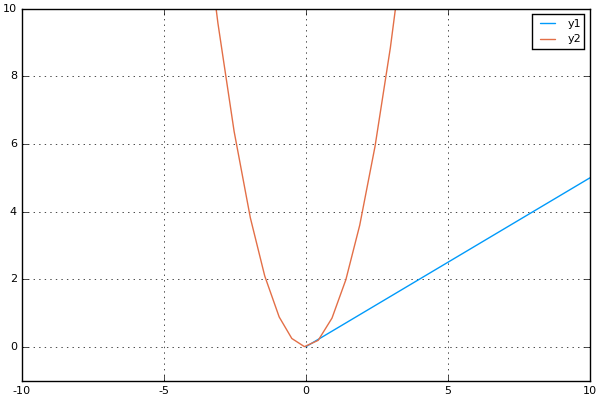

In [30]:
plot(a, b, xlim=(-10, 10), ylim=(-1, 10))
plot!(x->x^2)

In [124]:
# Usando la función x^3 - (9/2)x^2 + 1
g(x) = x^3 - (9/2)x^2 + 1
gp(x) = (3 * (x^2)) - 9x
gpp(x) = 6*x - 9;


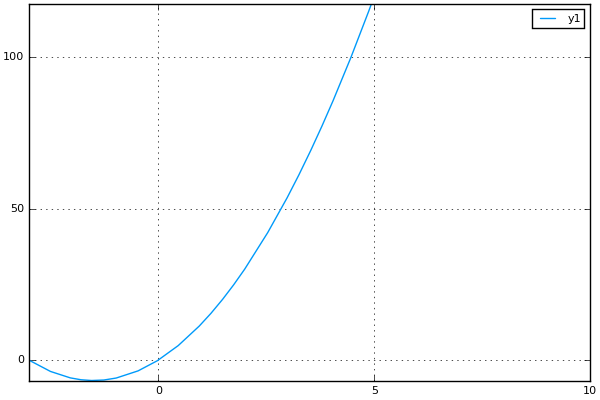

In [125]:
plot(x-> (3 * (x^2)) + 9x, xlim=(-3, 10))

In [126]:
c, d = Newton(gp, gpp, 1, 100)

(Number[1,0.2,0.0117647,4.57771e-5,6.98492e-10,1.6263e-19,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],Number[0.2,0.0117647,4.57771e-5,6.98492e-10,1.6263e-19,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

In [127]:
c[end]

0.0

In [128]:
g(ans)

1.0

Por lo tanto se trata de un mínimo.

In [133]:
p, q = Newton(gp, gpp, -2, 100)

(Number[-2,-4.0,-3.2,-3.01176,-3.00005,-3.0,-3.0,-3.0,-3.0,-3.0  …  -3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0],Number[-4.0,-3.2,-3.01176,-3.00005,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0  …  -3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0])

In [135]:
q[end]

-3.0

In [131]:
g(ans) # Es negativo, por lo tanto es un máximo.

-66.5


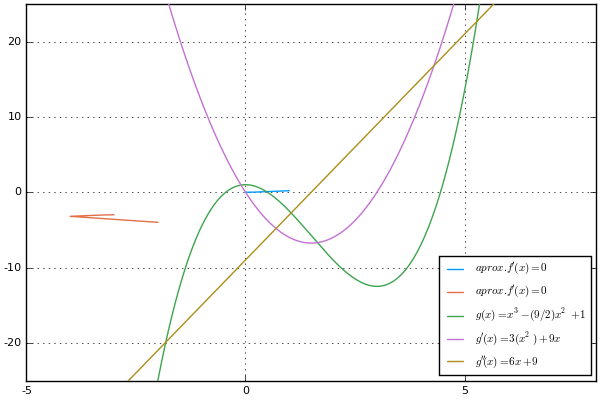

In [132]:
rango = -5:1e-2:8
plot(c, d, xlim=(-5, 8), ylim=(-25, 25), lab=L"aprox. f'(x) = 0")
plot!(p, q, xlim=(-5, 8), ylim=(-25, 25), lab=L"aprox. f'(x) = 0")
plot!(rango, x -> g(x), lab=L"g(x)= x^3 - (9/2)x^2 + 1")
plot!(rango, x -> gp(x), lab=L"g'(x) = 3(x^2) + 9x")
plot!(rango, x -> gpp(x), lab=L"g''(x) = 6x + 9")

#plot!(rango, x -> 0, lab=L"x = 0")

[2] Otro método para optimizar es darse cuenta de que la función misma te puede dar información sobre por dónde buscar. 

(i) Considerando una función $f:\mathbb{R} \to \mathbb{R}$, si empezamos en una posición inicial $x_0$, ¿en cuál dirección nos podríamos desplazar (por un paso chiquito) para ir hacia un mínimo?

(ii) Impleméntalo, y dibuja la evolución en el tiempo del algoritmo, pintando la función como si fuera una colina, para distintas funciones.

Este método se llama **descenso de gradiente**.

[3] Podemos utilizar el descenso de gradietne también para buscar mínimos de funciones $f:\mathbb{R^n} \to \mathbb{R}$. Hazlo para algunas funciones $f:\mathbb{R}^2 \to \mathbb{R}$ y dibuja la evolución.

Una versión estocástica del descenso de gradiente se utiliza mucho hoy día en aplicaciones de aprendizaje automático ("machine learning").

## Mínimos cuadrados

La optimización es muy imporante en la estadística. Por ejemplo, podemos utilizar optimización para resolver el problema de mínimos cuadrados, como sigue.

[4] Genera unos datos artificiales $(x_i, y_i)$ cerca de una recta, utilizando `rand()` para generar números aleatorios.

[5] Queremos ajustar una recta $\ell(x)$ a los datos. 

(i) ¿Cuántos parámetros necesitaremos ajustar. Escribe una fórmula para $\ell$ en términos de estos parámetros.

(ii) En mínimos cuadrados, para cada punto $(x_i, y_i)$ calculamos la distancia cuadrada vertical desde la recta $\ell$. La suma de todos ellos nos da una **función de costo** o **función de pérdida**, la cual queremos minimizar con respecto a las variables de la recta.

Formula esto matemáticamente: ¿cuál función queremos minimizar, y qué satisface el mínimo?

[6] Utiliza el método de descenso de gradiente para resolver el problema. Dibuja el resultado - ¿es razonable? [Pista: Nota que tendrás que utilizar vectores (arreglos uni-dimensionales). En Julia, puedes operar con vectores utilizando operadores aritméticos, como si fueran vectores matemáticos.]

## Optimización con restricciones

[7] Utiliza un multiplicador de Lagrange para minimizar la función
$f(x,y) = 2x+y$, sujeta a la **restricción** $x^2 + y^2 = 1$.

Dibuja gráficamente lo que está pasando.